# Homework 2 – Modeling & Evaluation

## Tasks
1. Classify the provided MNIST dataset (see files in `./data/*`) using a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Once your are statisfied with the classification results, save your model as `clf.joblib` with the provided command.
2. Inspect the creditcard dataset. Do you notice any relevant distribution in the data labels? [*(hint)*](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn) <br> Adjust the data in order to achieve a minimum of a 0.80 [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)-score for the minority class. Use a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)-Model and return the recall score of your result. Make sure to test the trained classifier with a test set from the *originally* distributed dataset, and use `random_state=42` and `test_size=0.33` on your `train_test_split`.


<b>Note: <br/>
You may have to install some packages on your own. <br/>
Make sure that you also push the `clf.joblib` file.</b>

## Solution 1

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from joblib import dump

from imblearn.over_sampling import RandomOverSampler 

import optuna

"""
Placehorder for comments:

"""
def mnistDTC():
    df = pd.read_csv("data/mnist_data.csv", index_col= 0)
    target = pd.read_csv("data/mnist_target.csv", index_col= 0)
    tree_clf = DecisionTreeClassifier()
    #Code your solution here

    # set params from bayesian search
    params = {'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_leaf': 1}
    tree_clf.set_params(**params)
    tree_clf.fit(df,target)

    #Dont change this part
    dump(tree_clf, 'clf.joblib') 
mnistDTC()

## Solution 2

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

"""
Your entire preprocessing must be applied here! You will have to define some additional imports here as well.
Placehorder for comments:

"""
def getTrainingResult():
    df = pd.read_pickle("./data/creditcard.pkl")
    clf = LogisticRegression()
    #Code your solution here

    X = df.iloc[:,:-1]
    y = df['Class']

    sm = RandomOverSampler(random_state=42)
    X_oversampled, y_oversampled = sm.fit_resample(X, y)

    clf = LogisticRegression(penalty='l1', solver='liblinear')
    clf.fit(X_oversampled, y_oversampled)

    _, X_test, _, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

    y_pred = clf.predict(X_test)

    #Dont change this part
    return recall_score(y_test, y_pred, average="binary")
getTrainingResult()

0.9194630872483222

## Playground
Use this space to come up for your solution. Once you solved a task, refactor it into the above provided solution functions.<br> *Make sure that all the necessary steps are included. You can test this by restarting your kernel and calling the function to check for errors.*

In [3]:
df = pd.read_csv("data/mnist_data.csv", index_col= 0)

target = pd.read_csv("data/mnist_target.csv", index_col= 0)


In [4]:

param_distributions = {
    'criterion': ["gini", "entropy"],
    'max_features': ["auto", "sqrt", "log2"],
    'max_depth': list(np.arange(2,15)),
    'min_samples_leaf':list(np.arange(1,5))
}

# apply early stopping through od_type = 'Iter'
model = DecisionTreeClassifier()

# perform grid search
rs_cv = RandomizedSearchCV(estimator = model, param_distributions= param_distributions, verbose = -1, n_iter=20)
rs_cv.fit(df,target)

# obtain best estimator and results
rs_best_dt = rs_cv.best_estimator_
print(rs_best_dt.get_params())

# print accuracy score for folds
score = cross_val_score(rs_best_dt, df, target, n_jobs=-1, cv=3)
print(score.mean())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
0.8330191928989068


[I 2021-11-21 17:05:46,187] A new study created in memory with name: no-name-88e4c505-0581-4a63-bd9a-2f4be1ab15c5
[I 2021-11-21 17:06:15,139] Trial 0 finished with value: 0.8020403543105855 and parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'max_depth': 11, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8020403543105855.
[I 2021-11-21 17:07:10,901] Trial 1 finished with value: 0.7369315613513537 and parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'max_depth': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8020403543105855.
[I 2021-11-21 17:07:25,095] Trial 2 finished with value: 0.5734473763758714 and parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'max_depth': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8020403543105855.
[I 2021-11-21 17:07:33,959] Trial 3 finished with value: 0.7804284184743938 and parameters: {'criterion': 'entropy', 'max_features': 'log2', 'max_depth': 16, 'min_samples_leaf': 2}. Best is trial 0 with valu

FrozenTrial(number=47, values=[0.838242199577528], datetime_start=datetime.datetime(2021, 11, 21, 17, 22, 30, 935074), datetime_complete=datetime.datetime(2021, 11, 21, 17, 22, 46, 478662), params={'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_leaf': 1}, distributions={'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2')), 'max_depth': IntUniformDistribution(high=20, low=2, step=1), 'min_samples_leaf': IntUniformDistribution(high=4, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=47, state=TrialState.COMPLETE, value=None)
Best trial: FrozenTrial(number=47, values=[0.838242199577528], datetime_start=datetime.datetime(2021, 11, 21, 17, 22, 30, 935074), datetime_complete=datetime.datetime(2021, 11, 21, 17, 22, 46, 478662), params={'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_leaf': 1}, distributions={'crit

C:\Users\Markus\AppData\Local\Temp/ipykernel_2148/3872022142.py:39: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
C:\Users\Markus\AppData\Local\Temp/ipykernel_2148/3872022142.py:40: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(study, ["max_depth", "criterion","max_features","min_samples_leaf"])
[W 2021-11-21 17:23:16,147] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<AxesSubplot:ylabel='criterion'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_features'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='criterion', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='max_depth'>,
        <AxesSubplot:xlabel='max_features'>,
        <AxesSubplot:xlabel='min_samples_leaf'>]], dtype=object)

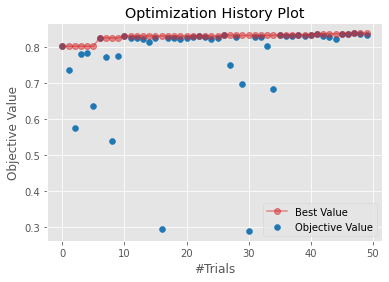

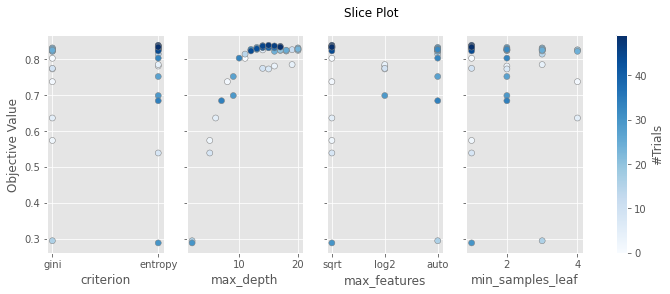

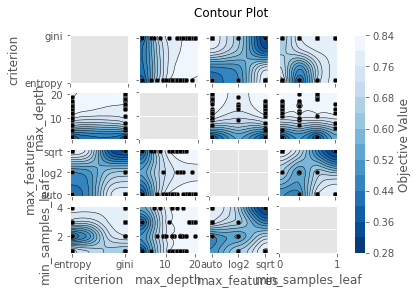

In [5]:
# perform bayesian search for greater efficency

def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    max_depth = trial.suggest_int("max_depth", 2, 20, log=False)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4,log=False)

    classifier_obj = DecisionTreeClassifier(
            max_depth=max_depth, 
            criterion=criterion, 
            max_features=max_features,
            min_samples_leaf=min_samples_leaf
        )

    score = cross_val_score(classifier_obj, df, target, n_jobs=-1, cv=3)

    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)


print(f"Best trial: {study.best_trial}")
trial = study.best_trial

print(f"Value:{trial.value}")
print(f"Params: {trial.params}")


optuna.visualization.matplotlib.plot_optimization_history(study)
optuna.visualization.matplotlib.plot_slice(study)
optuna.visualization.matplotlib.plot_contour(study, ["max_depth", "criterion","max_features","min_samples_leaf"])    

In [6]:
df = pd.read_pickle("./data/creditcard.pkl")

X = df.iloc[:,:-1]
y = df['Class']

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
sm = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

clf = LogisticRegression(penalty='l1', solver='liblinear')
score = cross_val_score(clf, X_oversampled, y_oversampled, n_jobs=-1, cv=3, scoring='recall')
recall = score.mean()

print(f"recall:{recall}")

recall:0.9234757082578394
